In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
import pandas as pd
df1=pd.read_csv("F:/PES/B_Tech (Sem_4)/CarPrice_Assignment.csv")

In [27]:
df1.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [29]:
cdf=df1[['curbweight','horsepower','peakrpm','citympg','price','wheelbase']]
cdf

,curbweight,horsepower,peakrpm,citympg,price,wheelbase
0,2548,111,5000,21,13495.0,88.6
1,2548,111,5000,21,16500.0,88.6
2,2823,154,5000,19,16500.0,94.5
3,2337,102,5500,24,13950.0,99.8
4,2824,115,5500,18,17450.0,99.4
...,...,...,...,...,...,...
200,2952,114,5400,23,16845.0,109.1
201,3049,160,5300,19,19045.0,109.1
202,3012,134,5500,18,21485.0,109.1
203,3217,106,4800,26,22470.0,109.1


In [33]:
mask=np.random.rand(len(df1))<0.8
train=cdf[mask]
test=cdf[~mask]
test

,curbweight,horsepower,peakrpm,citympg,price,wheelbase
1,2548,111,5000,21,16500.0,88.6
10,2395,101,5800,23,16430.0,101.2
16,3380,182,5400,16,41315.0,103.5
24,1967,68,5500,31,6229.0,93.7
25,1989,68,5500,31,6692.0,93.7
28,2535,88,5000,24,8921.0,103.3
29,2811,145,5000,19,12964.0,95.9
30,1713,58,4800,49,6479.0,86.6
36,2024,76,6000,30,7295.0,96.5
37,2236,86,5800,27,7895.0,96.5


In [34]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['curbweight','horsepower','peakrpm','citympg']])
train_y=np.asanyarray(train['price'])
regr.fit(train_x,train_y)

print("The coefficent is: ",regr.coef_)
print("The intercept is: ",regr.intercept_)

The coefficent is:  [  9.54243015  95.26635342   0.27296538 187.92683855]
The intercept is:  -27007.401883313476


<AxesSubplot:>

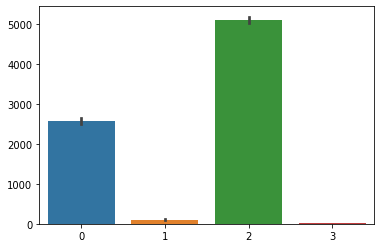

In [35]:
import seaborn as sns
sns.barplot(data=train_x)

In [36]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['curbweight','horsepower','peakrpm','citympg']])
test_y=np.asanyarray(test['price'])
test_y_=regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y-test_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y-test_y_)**2))
print("R2-score: %.2f" % r2_score(test_y,test_y_))

Mean absolute error: 2754.86
Residual sum of squares (MSE): 14851723.98
R2-score: 0.66


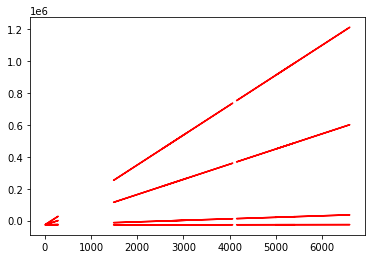

In [37]:
plt.plot(train_x, regr.coef_[0]*train_x + regr.intercept_, '-r')
plt.plot(train_x, regr.coef_[1]*train_x + regr.intercept_, '-r')
plt.plot(train_x, regr.coef_[2]*train_x + regr.intercept_, '-r')
plt.plot(train_x, regr.coef_[3]*train_x + regr.intercept_, '-r')
plt.show()

In [39]:
missing_percentage=df1.isnull().sum()*100/len(df1)
missing_percentage

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

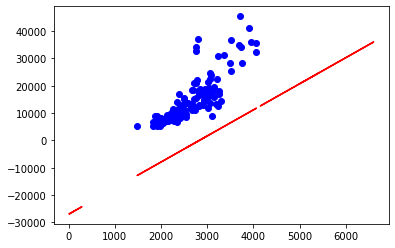

In [42]:
plt.scatter(train.curbweight, train.price,color='b')
plt.plot(train_x, regr.coef_[0]*train_x + regr.intercept_, '-r')

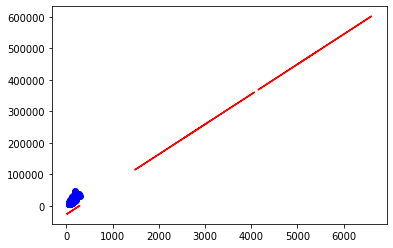

In [43]:
plt.scatter(train.horsepower, train.price,color='b')
plt.plot(train_x, regr.coef_[1]*train_x + regr.intercept_, '-r')